## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### The Dataset 
The data set was derrived from a combination of zip code data (SimpleMaps) and hospital consumer debt data (Company unnamed) 

### Goal
Our goal in this notebook is to predict if relative wealth (median house hold income) in certain zip codes, have higher likely hood of paying their overdue hospital bill. 

**Details:** For our target, we will categorize payment prediction by percentage of bill paid into 5 bins: 
- Group A: 90-100%
- Group B: 80-90% 
- Group C: 70-80%
- Group D: 50-70%
- Group F: < 50% 

In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd 
#import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

raw_df = pd.read_csv('Project_Data_v2.csv')

In [2]:
#removing useless columns: Unnamed:0, Purchase_ID, Seller_type, Creditor_name
df = raw_df.drop(['Unnamed: 0', 'Purchase_ID', 'Seller_Type', 'Creditor_Name'], axis=1)

In [3]:
#converting zip code to an object 
df['Entity_Zip'] = df['Entity_Zip'].astype(str)

In [4]:
#importing uszips file to retrive information 
df_zip = pd.read_csv('uszips.csv')
#groupby city
df_city = df_zip.groupby('city')
#creating pd.DataFrame from desired information, taking the mean household income per city 
df_city_mean = pd.DataFrame(df_city.income_household_median.mean())
#reseting index
df_city_mean = df_city_mean.reset_index()
#dropping null values 
df_city_mean.dropna(axis=0, inplace=True)
#revising city to be all upper to match current dataset in order to synch 
df_city_mean['city'] = df_city_mean['city'].str.upper()
df_city_mean.head()

,city,income_household_median
0,AARONSBURG,52788.0
1,ABBEVILLE,39562.0
2,ABBOT,43125.0
3,ABBOTSFORD,42036.0
4,ABBOTT,58750.0


In [5]:
#merging datasets
df_merge = pd.merge(df, df_city_mean, how='left', left_on='Entity_City' , 
                    right_on='city', left_index=True)

In [6]:
#filling null values in Median_Houshold_Income using the mediam household income in its respective cities
df_merge['Median_Household_Income'] = df_merge.Median_Household_Income.fillna(df_merge['income_household_median'])

In [7]:
#dropping unused columns and creating new name dataset called data
data = df_merge.copy()
data.drop(['city', 'income_household_median', 'Closure_Type', 'List_Date', 'Service_Date'], axis=1, inplace=True)

In [8]:
#creating age column 
data['Age'] = 2019 - data.Year_Born
#filling null values with median age, 50 years old
data['Age'] = data.Age.fillna(data.Age.mean())

#fill null values in Household income with mean
data['Median_Household_Income'] = data.Median_Household_Income.fillna(data.Median_Household_Income.mean())

#dropping more unused columns 
data.drop(['Year_Born', 'Filed_Bankrupcy', 'Deceased', 'Gender'],axis=1, inplace=True)

#checking shape and null values
print(data.shape)
data.isna().sum()

(556536, 11)


Account_ID                    0
Entity_ID                     0
Purchased_bal                 0
Entity_City                 110
Entity_State                 85
Entity_Zip                    0
Median_Household_Income       0
Total_Paid                 1992
Number_of_payments         1992
Percent_Paid               1992
Age                           0
dtype: int64

In [9]:
#dropping the remaining missing values
data.dropna(axis=0, inplace=True)
data.shape

(554399, 11)

In [10]:
#creating function for different target categories 
def make_target(row): 
    if row >= .9: 
        return('A')
    elif row < .9 and row >= .8: 
        return('B')
    elif row < .8 and row >= .7: 
        return('C')
    elif row < .7 and row >= .5: 
        return('D')
    else: 
        return('F')
    
    
#creating bins for Median_Household_Income
def income(row):
    if row > 150000 : return('0ver_150k')
    elif row <= 150000 and row > 100000 :
        return('100k_to_150k')
    elif row <= 100000 and row > 75000 :
        return('75k_to_100k')
    elif row <= 75000 and row > 50000 : 
        return('50k_to_75k')
    elif row <= 50000 and row > 35000 : 
        return('35k_to_50k')
    elif row <= 35000 and row > 25000 : 
        return('25k_to_35k')
    elif row <= 25000 and row > 20000 : 
        return('20k_to_25k')
    else : 
        return('Under_20k')
    
#applying income function     
data['Income_level'] = data.Median_Household_Income.apply(income)
#applying target function and creating new column call Target 
data['Target'] = data.Percent_Paid.apply(make_target)

In [12]:
data.head()

,Account_ID,Entity_ID,Purchased_bal,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Age,Income_level,Target
187,10271495,10921468,100.00,ALICE,TX,78332.0,41966.000,48.00,1.0,0.48,74.0,35k_to_50k,F
5910,10271501,10431006,42.82,FREER,TX,78357.0,44846.000,24.41,1.0,0.57,64.0,35k_to_50k,D
14721,10271513,10428123,171.00,SAN DIEGO,TX,78384.0,76554.375,95.00,1.0,0.56,64.0,75k_to_100k,D
5122,10271529,10921502,3525.00,ENCINO,TX,78353.0,62181.500,2250.00,9.0,0.64,74.0,50k_to_75k,D
5122,10271597,10921502,2008.80,ENCINO,TX,78353.0,62181.500,1305.72,6.0,0.65,74.0,50k_to_75k,D


In [58]:
data.shape

(554399, 13)

In [13]:
data.columns

Index(['Account_ID', 'Entity_ID', 'Purchased_bal', 'Entity_City',
       'Entity_State', 'Entity_Zip', 'Median_Household_Income', 'Total_Paid',
       'Number_of_payments', 'Percent_Paid', 'Age', 'Income_level', 'Target'],
      dtype='object')

In [11]:
#seperating dataframes by grade
A = data[data.Target == 'A']
B = data[data.Target == 'B']
C = data[data.Target == 'C']
D = data[data.Target == 'D']
E = data[data.Target == 'E']
F = data[data.Target == 'F']

In [12]:
data.Target.value_counts()

D    221528
A    152008
F    103195
C     63375
B     14293
Name: Target, dtype: int64

**Details:** For our target, we will categorize payment prediction by percentage of bill paid into 5 bins: 
- Group A: 90-100%
- Group B: 80-90% 
- Group C: 70-80%
- Group D: 50-70%
- Group F: < 50% 


#### Q. Top household income? 
A. Income level between 50k to 75K, median income of 55.88k

#### Q. Which grade has the highest frequency? 
A: Grade **A** has over 152k accounts paid

#### Q. Of those 152k + accounts, Grade A
what is the average purchased balanced? 
**A: 268.22**
what is the average paid amount? 
**A: 271.49**
what is the average number of payments? 
**A: 2.2** 
what is the median household income? 
**A: 56.47k**
what is the top 3 zipcodes? 
1. 44107 (876)
2. 44124 (720)
3. 44212 (619)

what is the total collected amount for group A?
**A: 41.2M**

#### Q. Of those 152K + accounts, Grade E
What is the average purchased balanced? 
**A: 452.09**
What is the average paid amount? 
**A: 229.98**
What is the average number of payments? 
**A: 1.37**
What is the median household income? 
**A: 55.k**40
What is the top 3 zipcodes? 
1. 44107 (1023)
2. 44124 (925)
3. 44212 (889)

What is the total collected amount for group D?
**A: 33.3M**

**Intuitive assumptions:** 
The average houshold income from group A and E that pays more than 50% of their bill, are between 45k - 55k and has a an average age of 50. Intuitively, I assume people in this income range and age cares about their credit score vs. other income ranges, therefore they either pay-off or settle the bill for a discount in order to avoid a reduction in credit score. 
[FED data on income and credit score correlation](https://www.federalreserve.gov/econres/notes/feds-notes/are-income-and-credit-scores-highly-correlated-20180813.htm)

In [23]:
#top 5 zipcodes where accounts were payments
zip_44107 = data[data.Entity_Zip == '44107.0']
zip_44124 = data[data.Entity_Zip == '44124.0']
zip_44212 = data[data.Entity_Zip == '44212.0']
zip_44118 = data[data.Entity_Zip == '44118.0']
zip_44060 = data[data.Entity_Zip == '44060.0']

In [59]:
data.dtypes

Account_ID                   int64
Entity_ID                    int64
Purchased_bal              float64
Entity_City                 object
Entity_State                object
Entity_Zip                  object
Median_Household_Income    float64
Total_Paid                 float64
Number_of_payments         float64
Percent_Paid               float64
Age                        float64
Income_level                object
Target                      object
dtype: object

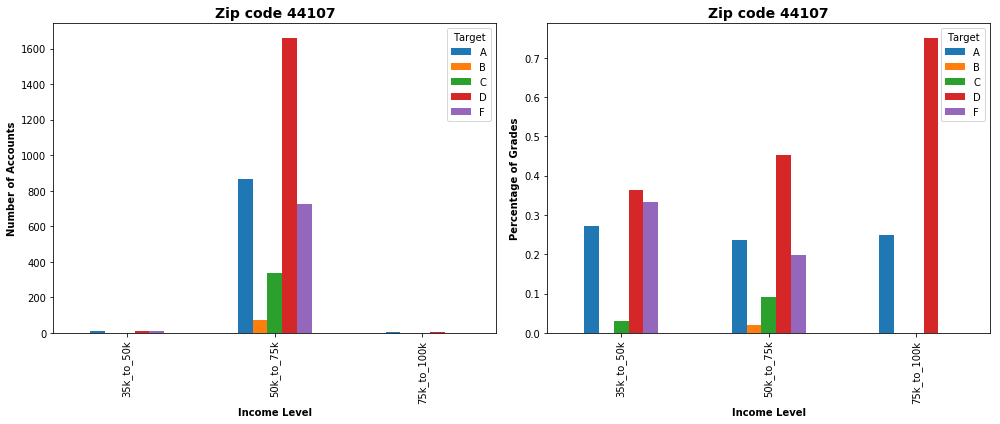

In [57]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))


df_44107 = zip_44107.groupby('Income_level')['Target'].value_counts().unstack()
df_44107.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Income Level',rotation=0, fontsize=10, fontweight='bold')
ax1.set_ylabel('Number of Accounts',fontsize=10, fontweight='bold')
ax1.set_title('Zip code 44107', fontsize=14, fontweight='bold', loc='center')

df_44107 = zip_44107.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44107.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Income Level',rotation=0, fontsize=10, fontweight='bold')
# ax2.set_xticks(rotation=0)
ax2.set_ylabel('Percentage of Grades',fontsize=10, fontweight='bold')
ax2.set_title('Zip code 44107', fontsize=14, fontweight='bold', loc='center')


plt.tight_layout()
plt.show();

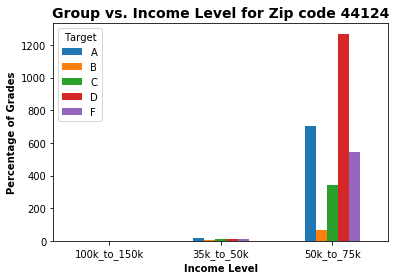

In [47]:


df_44124 = zip_44124.groupby('Income_level')['Target'].value_counts().unstack()
df_44124.plot(kind='bar')
plt.xlabel('Income Level',rotation=0, fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Grades',fontsize=10, fontweight='bold')
plt.title('Group vs. Income Level for Zip code 44124',fontsize=14, fontweight='bold');

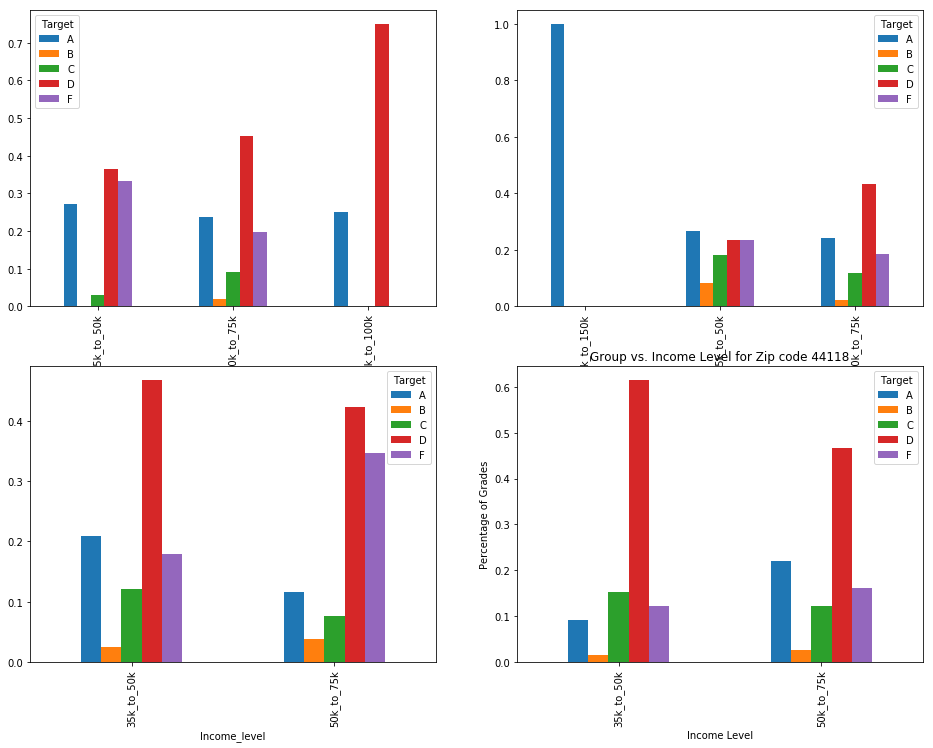

In [41]:
df_44107 = zip_44107.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44107.plot(kind='bar', ax=ax1)
plt.xlabel('Income Level',rotation=0)
plt.ylabel('Percentage of Grades')
plt.title('Group vs. Income Level for Zip code 44107', fontsize=14, fontweight='bold');

df_44124 = zip_44124.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44124.plot(kind='bar', ax=ax2)
plt.xlabel('Income Level')
plt.ylabel('Percentage of Grades')
plt.title('Group vs. Income Level for Zip code 44124');

df_44212 = zip_44212.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44212.plot(kind='bar', ax=ax3)
plt.xlabel('Income Level')
plt.ylabel('Percentage of Grades')
plt.title('Group vs. Income Level for Zip code 44212');

df_44118 = zip_44118.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
df_44118.plot(kind='bar', ax=ax4)
plt.xlabel('Income Level')
plt.ylabel('Percentage of Grades')
plt.title('Group vs. Income Level for Zip code 44118');

# df_44060 = zip_44060.groupby('Income_level')['Target'].value_counts(normalize=True).unstack()
# df_44060.plot(kind='bar', ax=ax5)
# plt.xlabel('Income Level')
# plt.ylabel('Percentage of Grades')
# plt.title('Group vs. Income Level for Zip code 44060');

""
Income_level


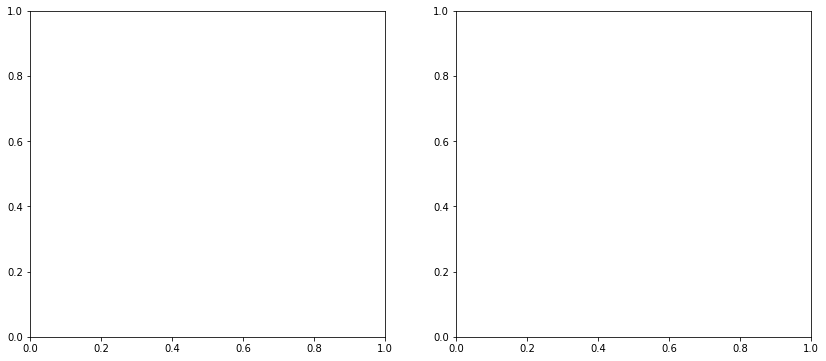

In [17]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

sub_A = A[A.Entity_Zip == 44107].groupby('Income_level')
sub_A.plot(kind='bar', ax=ax1)


sub_D = D[D.Entity_Zip == 44107].groupby('Income_level')
sub_D.plot(kind='bar', ax=ax2)

In [63]:
A.Total_Paid.sum()

41268839.66000001

In [56]:
# groups = [A, B, C, D ,E ,F]
# for i in groups: 
#     print(f'Group {i}')
#     print(f'Avg. Purchased balance: ${round(i.Purchased_bal.mean(),2)}')
#     print(f'Avg. Paid amount: ${round(i.Total_Paid.mean(),2)}')
#     print(f'Avg. Number of payments: {round(i.Number_of_payments.mean(),2)}')
#     print(f'Median household income: ${round(i.Median_Household_Income.mean(),2)}')

Group        Account_ID  Entity_ID  Purchased_bal       Entity_City Entity_State  \
15428    10274131    1657270         163.40          SKIDMORE           TX   
1067     10275215   10437923         394.42          BEEVILLE           TX   
92       10276068   10926041        1000.00        AGUA DULCE           TX   
92       10276233   10926041         550.00        AGUA DULCE           TX   
10135    21901390   10932015        1977.00            MATHIS           TX   
3547     10283229   10561562        4200.00    CORPUS CHRISTI           TX   
3547     10285190   10517771         225.50    CORPUS CHRISTI           TX   
3547     10285644   10935617         126.99    CORPUS CHRISTI           TX   
10947    10289766   10939745         511.03       MOORESVILLE           NC   
10947    13306356    4088620       10492.73       MOORESVILLE           NC   
17262    10292612   10607073         141.60            VENICE           FL   
17262    10292651   10942630        2298.00            VEN

In [59]:

print('Group D')
print(f'Avg. Purchased balance: ${round(D.Purchased_bal.mean(),2)}')
print(f'Avg. Paid amount: ${round(D.Total_Paid.mean(),2)}')
print(f'Avg. Number of payments: {round(D.Number_of_payments.mean(),2)}')
print(f'Median household income: ${round(D.Median_Household_Income.mean(),2)}')

print('\n')
print('Group A')
print(f'Avg. Purchased balance: ${round(A.Purchased_bal.mean(),2)}')
print(f'Avg. Paid amount: ${round(A.Total_Paid.mean(),2)}')
print(f'Avg. Number of payments: {round(A.Number_of_payments.mean(),2)}')
print(f'Median household income: ${round(A.Median_Household_Income.mean(),2)}')

Group D
Avg. Purchased balance: $442.47
Avg. Paid amount: $240.87
Avg. Number of payments: 1.48
Median household income: $55679.71


Group A
Avg. Purchased balance: $268.22
Avg. Paid amount: $271.49
Avg. Number of payments: 2.26
Median household income: $56472.35


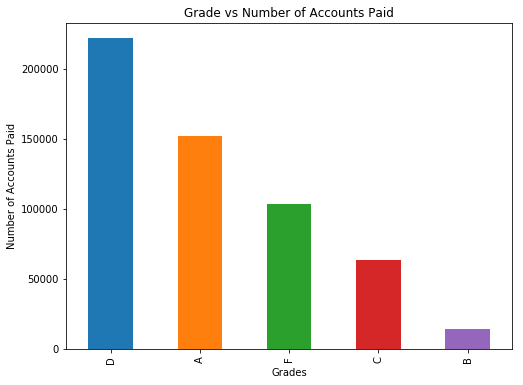

In [43]:
#answer for Q1
to_plot = data.Target.value_counts()
to_plot.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Grades')
plt.ylabel('Number of Accounts Paid');
plt.title('Grade vs Number of Accounts Paid');

In [51]:
data.Median_Household_Income.mean()

55877.93311294937

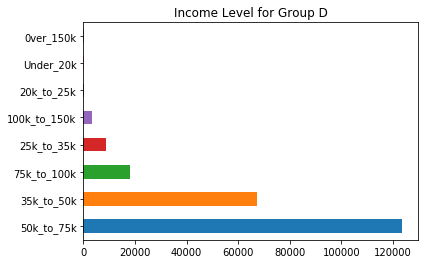

In [66]:
D.Income_level.value_counts().plot(kind='barh')
plt.title('Income Level for Group D');

In [74]:
D.dtypes

Account_ID                   int64
Entity_ID                    int64
Purchased_bal              float64
Entity_City                 object
Entity_State                object
Entity_Zip                  object
Median_Household_Income    float64
Total_Paid                 float64
Number_of_payments         float64
Percent_Paid               float64
Age                        float64
Income_level                object
Target                      object
dtype: object

In [75]:
D_35 = D[D.Income_level == '35k_to_50k']

In [80]:
D_35.Median_Household_Income.mean()

43633.810355319474

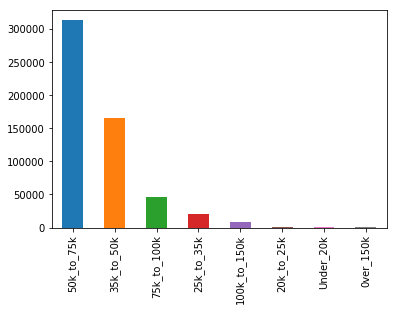

In [15]:
data.Income_level.value_counts().plot(kind='bar')

In [16]:
df_top_income = data[data.Income_level == '50k_to_75k']
print(df_top_income.shape)
df_top_income.head()

(312613, 13)


,Account_ID,Entity_ID,Purchased_bal,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Age,Income_level,Target
5122,10271529,10921502,3525.00,ENCINO,TX,78353.0,62181.50,2250.00,9.0,0.64,74.000000,50k_to_75k,D
5122,10271597,10921502,2008.80,ENCINO,TX,78353.0,62181.50,1305.72,6.0,0.65,74.000000,50k_to_75k,D
12329,10271686,10921659,942.60,ORANGE GROVE,TX,78372.0,51000.00,706.95,3.0,0.75,50.002115,50k_to_75k,C
1370,10271827,10921800,686.85,BISHOP,TX,78343.0,50892.75,350.00,1.0,0.51,50.002115,50k_to_75k,D
14782,10272109,10440190,147.41,SANDIA,TX,78383.0,53837.00,73.71,1.0,0.50,64.000000,50k_to_75k,D


In [17]:
df_top_income['Entity_Zip'] = df_top_income['Entity_Zip'].astype('str')

In [18]:
#high level description for obejcts 
df_top_income.describe(include='all')

,Account_ID,Entity_ID,Purchased_bal,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,Number_of_payments,Percent_Paid,Age,Income_level,Target
count,3.126130e+05,3.126130e+05,312613.000000,312613,312613,312613,312613.000000,312613.000000,312613.000000,312613.000000,312613.000000,312613,312613
unique,NaN,NaN,NaN,6637,55,10722,NaN,NaN,NaN,NaN,NaN,1,5
top,NaN,NaN,NaN,ORLANDO,FL,44107.0,NaN,NaN,NaN,NaN,NaN,50k_to_75k,D
freq,NaN,NaN,NaN,12655,74542,3660,NaN,NaN,NaN,NaN,NaN,312613,123668
mean,1.752191e+07,1.625998e+07,414.216055,NaN,NaN,NaN,58103.731963,253.553897,1.804068,0.682163,49.870279,NaN,NaN
std,4.101534e+06,5.478696e+06,910.043710,NaN,NaN,NaN,5958.219311,436.141286,3.265397,4.515191,14.390023,NaN,NaN
min,1.027153e+07,5.540000e+02,0.020000,NaN,NaN,NaN,50002.368421,2.810000,1.000000,0.000000,-15.000000,NaN,NaN
25%,1.406134e+07,1.269930e+07,100.000000,NaN,NaN,NaN,53591.750000,66.050000,1.000000,0.500000,38.000000,NaN,NaN
50%,1.785162e+07,1.660486e+07,200.000000,NaN,NaN,NaN,55892.137548,125.000000,1.000000,0.600000,50.002115,NaN,NaN
75%,2.131919e+07,2.078698e+07,469.770000,NaN,NaN,NaN,61278.000000,287.250000,1.000000,1.000000,60.000000,NaN,NaN


#### Top household income level: 50k to 75k 
- Grade: D, individuals in this group settles their overdue bill in the 50-70% range.  
- Zip code: 44107 
- City: Orlando 
- State: FL 

In [19]:
zip_income = pd.DataFrame(df_top_income.Entity_Zip.value_counts())
zip_income.reset_index(inplace=True)
zip_income.head()

,index,Entity_Zip
0,44107.0,3660
1,44124.0,2924
2,44060.0,2182
3,44035.0,2135
4,44118.0,2123


In [20]:
zip_income.columns = ['Zip_code', 'Frequency']
top_10 = zip_income.iloc[0:9]
top_10

,Zip_code,Frequency
0,44107.0,3660
1,44124.0,2924
2,44060.0,2182
3,44035.0,2135
4,44118.0,2123
5,44094.0,1937
6,48180.0,1841
7,8724.0,1829
8,44146.0,1787


No handles with labels found to put in legend.


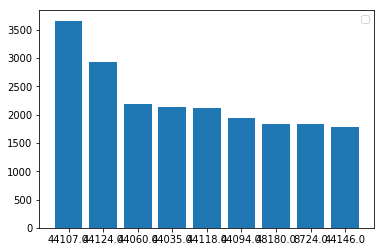

In [21]:
#trying to plot top 10 zip codes against Frequency 
plt.bar(top_10.Zip_code, top_10.Frequency)
plt.legend()
